In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('D:\Data-Analysis\Stock Market\CSV/Wipro_daywise.csv')
data.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
5364,7-January-1998,487.00,504.00,487.00,500.00,495.854545,2750,36,1363600.0,NaN,NaN,17.00,13.00
5365,6-January-1998,482.00,490.00,481.25,489.50,485.736842,950,16,461450.0,NaN,NaN,8.75,7.50
5366,5-January-1998,479.00,495.00,479.00,489.75,487.439759,4150,45,2022875.0,NaN,NaN,16.00,10.75
5367,2-January-1998,470.00,479.00,467.00,477.50,472.416522,3450,41,1629837.0,NaN,NaN,12.00,7.50
5368,1-January-1998,473.25,473.25,458.00,465.75,467.988832,1970,22,921938.0,NaN,NaN,15.25,-7.50


In [4]:
#plt.plot(data.index, data['Close Price'], c='blue')

In [5]:
#data = data[data['Close Price']<800]
#plt.scatter(data['Year'], data['Close Price'], c='blue')

In [6]:
mms = MinMaxScaler(feature_range=(0,1))

In [7]:
close = np.array(data['Close Price'])
year = np.array(data.index)

In [8]:
train = mms.fit_transform(close.reshape(-1,1))

In [9]:
#plt.plot(data.index, train)

In [10]:
from sklearn.svm import SVR
#svr = SVR(kernel='linear')

In [11]:
#svr.fit(year[:-1].reshape(-1,1), train[:-1].reshape(-1,1))

In [12]:
#close_coef = svr.predict(2018)

In [13]:
#close_coef*max(close)

In [14]:
mu, sgm = np.mean(close), np.std(close)

In [15]:
sp.stats.norm.interval(0.1, loc=mu, 
    scale=sgm)

(858.1996030681742, 1117.8292849929176)

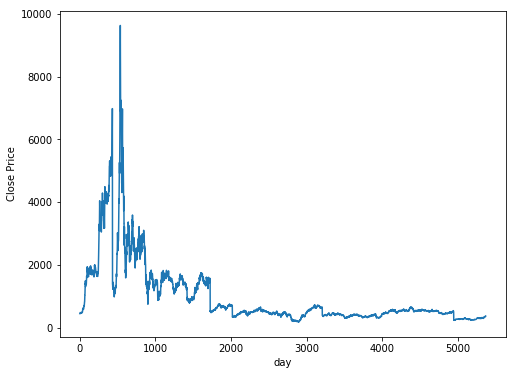

In [18]:
close = np.array(data['Close Price'])
close = close[::-1]
plt.figure(figsize=(8,6))
plt.plot(close)
plt.xlabel('day')
plt.ylabel('Close Price')
plt.show()

In [19]:
mms = MinMaxScaler(feature_range=(0,1))
close = mms.fit_transform(close.reshape(-1,1))

In [20]:
close

array([[0.02814772],
       [0.0293946 ],
       [0.03069454],
       ...,
       [0.01846448],
       [0.01894201],
       [0.01969014]])

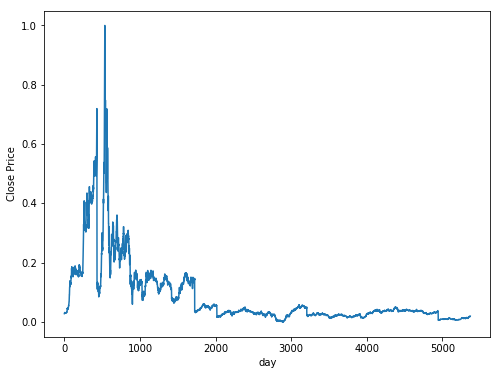

In [21]:
plt.figure(figsize=(8,6))
plt.plot(close)
plt.xlabel('day')
plt.ylabel('Close Price')
plt.show()

In [22]:
close = [i for i in close]
series = pd.DataFrame({'Close': close})
#data.set_index('Year', inplace=True)

In [23]:
series.index = data.index
series.head()

,Close
0,[0.02814771581684088]
1,[0.029394598609858335]
2,[0.030694540245131848]
3,[0.030668010824003823]
4,[0.03178224651138112]


In [24]:
series.drop(index=2018, inplace=True)
series.tail()

,Close
5364,[0.017567782670982118]
5365,[0.01824693585185971]
5366,[0.018464477105109563]
5367,[0.018942006685414122]
5368,[0.0196901363612246]


In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.array(series), order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5367
Model:                 ARIMA(0, 1, 0)   Log Likelihood               16633.039
Method:                           css   S.D. of innovations              0.011
Date:                Mon, 25 Mar 2019   AIC                         -33262.077
Time:                        19:43:08   BIC                         -33248.901
Sample:                             1   HQIC                        -33257.476
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.576e-06      0.000     -0.011      0.992      -0.000       0.000


In [37]:
year = [2019, 2020, 2021]
scaled_predict = model_fit.forecast()

In [44]:
scaled_predict = [i for i in scaled_predict]
#future_price = mms.inverse_transform(scaled_predict)
#print(future_price)
print(scaled_predict)

[array([0.01968856]), array([0.01091006]), array([[-0.00169476,  0.04107188]])]


In [45]:
#plot_acf(series, lags=100)

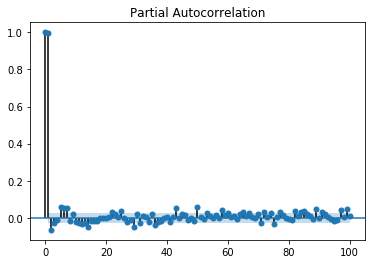

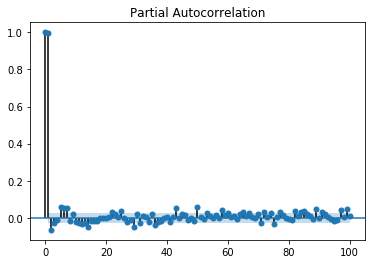

In [46]:
plot_pacf(series, lags=100)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [63]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%.3f, expected=%.3f' % (yhat, obs))


predicted=0.016, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.015
predicted=0.015, expected=0.017
predicted=0.017, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.017
predicted=0.017, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.019
predicted=0.019, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.018, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.017
predicted=0.017, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.021
predicted=0.021, expected=0.020
predicted=0.020, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.022


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.022, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.022


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.023, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.022


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.022, expected=0.021
predicted=0.021, expected=0.020
predicted=0.020, expected=0.021
predicted=0.021, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.025

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=0.025, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.025


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.025


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.025, expected=0.024
predicted=0.024, expected=0.023
predicted=0.023, expected=0.025
predicted=0.025, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.024
predicted=0.024, expected=0.024


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.023
predicted=0.023, expected=0.024
predicted=0.024, expected=0.023
predicted=0.023, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.025
predicted=0.025, expected=0.025


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.025, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.025
predicted=0.025, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.025
predicted=0.025, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.024
predicted=0.024, expected=0.023
predicted=0.023, expected=0.024
predicted=0.024, expected=0.024
predicted=0.024, expected=0.026
predicted=0.026, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.022, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.022, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.022
predicted=0.022, expected=0.020
predicted=0.020, expected=0.020


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.020, expected=0.020
predicted=0.020, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.021
predicted=0.021, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.021, expected=0.022
predicted=0.022, expected=0.021


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.021, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.020
predicted=0.020, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.021, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.020


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.020, expected=0.018
predicted=0.018, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.016
predicted=0.016, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.018
predicted=0.018, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.016
predicted=0.016, expected=0.015
predicted=0.015, expected=0.016


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.016, expected=0.016
predicted=0.016, expected=0.015
predicted=0.015, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.018
predicted=0.018, expected=0.018


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.018, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.019, expected=0.019
predicted=0.019, expected=0.019


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.018, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.019
predicted=0.019, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.014
predicted=0.014, expected=0.015
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.017, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.021
predicted=0.021, expected=0.020
predicted=0.020, expected=0.019


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.018
predicted=0.018, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.018
predicted=0.018, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.024
predicted=0.024, expected=0.021
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=0.021, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.022


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.021
predicted=0.021, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.023
predicted=0.023, expected=0.025
predicted=0.025, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.026
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.015
predicted=0.015, expected=0.016
predicted=0.016, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.014, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.014
predicted=0.014, expected=0.013
predicted=0.013, expected=0.014


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.014, expected=0.014
predicted=0.014, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.015
predicted=0.015, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.015
predicted=0.015, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.016

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=0.016, expected=0.015
predicted=0.015, expected=0.016
predicted=0.016, expected=0.016
predicted=0.016, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017
predicted=0.017, expected=0.017


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.017, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.020
predicted=0.020, expected=0.019
predicted=0.019, expected=0.020
predicted=0.020, expected=0.019
predicted=0.019, expected=0.019
predicted=0.019, expected=0.022
predicted=0.022, expected=0.023
predicted=0.023, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.026
predicted=0.026, expected=0.027
predicted=0.027, expected=0.026


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.026, expected=0.026
predicted=0.026, expected=0.027
predicted=0.027, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.028
predicted=0.028, expected=0.027
predicted=0.027, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.029


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.031
predicted=0.031, expected=0.032
predicted=0.032, expected=0.033
predicted=0.033, expected=0.031
predicted=0.031, expected=0.033
predicted=0.033, expected=0.032
predicted=0.032, expected=0.033
predicted=0.033, expected=0.031
predicted=0.031, expected=0.029
predicted=0.029, expected=0.030
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.029, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.030


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.030, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.033
predicted=0.033, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.033
predicted=0.033, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.035
predicted=0.035, expected=0.037


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.037
predicted=0.037, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.039


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.039, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.042
predicted=0.042, expected=0.043
predicted=0.043, expected=0.042
predicted=0.042, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=0.041, expected=0.041
predicted=0.041, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.041
predicted=0.041, expected=0.039
predicted=0.039, expected=0.041
predicted=0.041, expected=0.037
predicted=0.037, expected=0.035
predict

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.035, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.035
predicted=0.035, expected=0.035
predicted=0.035, expected=0.035
predicted=0.035, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.038, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.042
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.038, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.042
predicted=0.042, expected=0.042
predicted=0.042, expected=0.044
predicted=0.044, expected=0.044
predicted=0.044, expected=0.042
predicted=0.042, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.041


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.041, expected=0.042


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.042, expected=0.041
predicted=0.041, expected=0.042
predicted=0.042, expected=0.041


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.041, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.042
predicted=0.042, expected=0.043
predicted=0.043, expected=0.042
predicted=0.042, expected=0.043
predicted=0.043, expected=0.043
predicted=0.043, expected=0.043
predicted=0.043, expected=0.045
predicted=0.045, expected=0.045
predicted=0.045, expected=0.044
predicted=0.044, expected=0.046
predicted=0.046, expected=0.047
predicted=0.047, expected=0.048
predicted=0.048, expected=0.047
predicted=0.047, expected=0.047
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.049, expected=0.050
predicted=0.050, expected=0.049
predicted=0.049, expected=0.050
predicted=0.050, expected=0.049
predicted=0.049, expected=0.048
predicted=0.048, expected=0.048
predicted=0.048, expected=0.048
predicted=0.048, expected=0.046
predicted=0.046, expected=0.047
predicted=0.047, expected=0.047
predicted=0.047, expected=0.046
predicted=0.046, expected=0.046
predicted=0.046, expected=0.048
predicted=0.048, expected=0.047
predicted=0.047, expected=0.048
predicted=0.048, expected=0.049
predicted=0.049, expected=0.046
predicted=0.046, expected=0.044
predicted=0.044, expected=0.045
predicted=0.045, expected=0.045
predicted=0.045, expected=0.046
predicted=0.046, expected=0.045
predicted=0.045, expected=0.044
predicted=0.044, expected=0.044
predicted=0.044, expected=0.044
predicted=0.044, expected=0.044
predicted=0.044, expected=0.045
predicted=0.045, expected=0.043
predicted=0.043, expected=0.043
predicted=0.043, expected=0.041
predicted=0.041, expected=0.040
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.041
predicted=0.041, expected=0.042
predicted=0.042, expected=0.042
predicted=0.042, expected=0.042
predicted=0.042, expected=0.043
predicted=0.043, expected=0.042
predicted=0.042, expected=0.041
predicted=0.041, expected=0.042
predicted=0.042, expected=0.042


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.042, expected=0.042
predicted=0.042, expected=0.042
predicted=0.042, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.042
predicted=0.042, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.036, expected=0.035
predicted=0.035, expected=0.033
predicted=0.033, expected=0.034
predicted=0.034, expected=0.035
predicted=0.035, expected=0.035
predicted=0.035, expected=0.035
predicted=0.035, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.035
predicted=0.035, expected=0.035
predicted=0.035, expected=0.035
predicted=0.035, expected=0.034
predicted=0.034, expected=0.035


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.035, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.036, expected=0.036
predicted=0.036, expected=0.035
predicted=0.035, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.041
predicted=0.041, expected=0.041
predicted=0.041, expected=0.043
predicted=0.043, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.038


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.035
predicted=0.035, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.038, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.039
predicted=0.039, expected=0.039
predicted=0.039, expected=0.040
predicted=0.040, expected=0.039
predicted=0.039, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.037
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.027, expected=0.026
predicted=0.026, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.025
predicted=0.025, expected=0.025
predicted=0.025, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.026
predicted=0.026, expected=0.027
predicted=0.027, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.027


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.027, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.028
predicted=0.028, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.029, expected=0.029
predicted=0.029, expected=0.028
predicted=0.028, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.029
predicted=0.029, expected=0.029
predicted=0.029, expected=0.030
predicted=0.030, expected=0.030
predicted=0.030, expected=0.029
predicted=0.029, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.027
predicted=0.027, expected=0.028
predicted=0.028, expected=0.027
predicted=0.027, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.028
predicted=0.028, expected=0.029
predicted=0.029, expected=0.029
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.031, expected=0.032


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.032, expected=0.032
predicted=0.032, expected=0.031
predicted=0.031, expected=0.032
predicted=0.032, expected=0.032
predicted=0.032, expected=0.033
predicted=0.033, expected=0.033
predicted=0.033, expected=0.032
predicted=0.032, expected=0.033
predicted=0.033, expected=0.033


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.033, expected=0.033


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.033, expected=0.033
predicted=0.033, expected=0.033
predicted=0.033, expected=0.033
predicted=0.033, expected=0.033
predicted=0.033, expected=0.033


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.033, expected=0.032
predicted=0.032, expected=0.033
predicted=0.033, expected=0.032
predicted=0.032, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.032
predicted=0.032, expected=0.032
predicted=0.032, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.031
predicted=0.031, expected=0.032
predicted=0.032, expected=0.032
predicted=0.032, expected=0.032


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.032, expected=0.033
predicted=0.033, expected=0.032
predicted=0.032, expected=0.032
predicted=0.032, expected=0.033
predicted=0.033, expected=0.032


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.032, expected=0.033
predicted=0.033, expected=0.032
predicted=0.032, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.034
predicted=0.034, expected=0.035
predicted=0.035, expected=0.036
predicted=0.036, expected=0.035
predicted=0.035, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.036
predicted=0.036, expected=0.037
predicted=0.037, expected=0.038
predicted=0.038, expected=0.038
predicted=0.038, expected=0.037
predicted=0.037, expected=0.037
predicted=0.037, expected=0.036
predicted=0.036, expected=0.035
predicted=0.035, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.006, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.006
predicted=0.006, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.008
predicted=0.008, expected=0.007
predicted=0.007, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.011
predicted=0.011, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.011, expected=0.011
predicted=0.011, expected=0.011
predicted=0.011, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.013
predicted=0.013, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.012
predicted=0.012, expected=0.014
predicted=0.014, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.014
predicted=0.014, expected=0.013
predicted=0.013, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.011
predicted=0.011, expected=0.011
predicted=0.011, expected=0.011
predicted=0.011, expected=0.011
predicted=0.011, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.006
predicted=0.006, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.007
predicted=0.007, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.008
predicted=0.008, expected=0.008
predicted=0.008, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.009
predicted=0.009, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.010
predicted=0.010, expected=0.011
predicted=0.011, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.014
predicted=0.014, expected=0.014
predicte

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.014, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.013, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.012
predicted=0.012, expected=0.012
predicted=0.012, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.014
predicted=0.014, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.013
predicted=0.013, expected=0.014
predicted=0.014, expected=0.013
predicted=0.013, expected=0.012
predicted=0.012, expected=0.011
predicted=0.011, expected=0.013
predicte

In [64]:
#series.values
len(predictions), len(test)

(1826, 1826)

Test RMSE: 0.000980


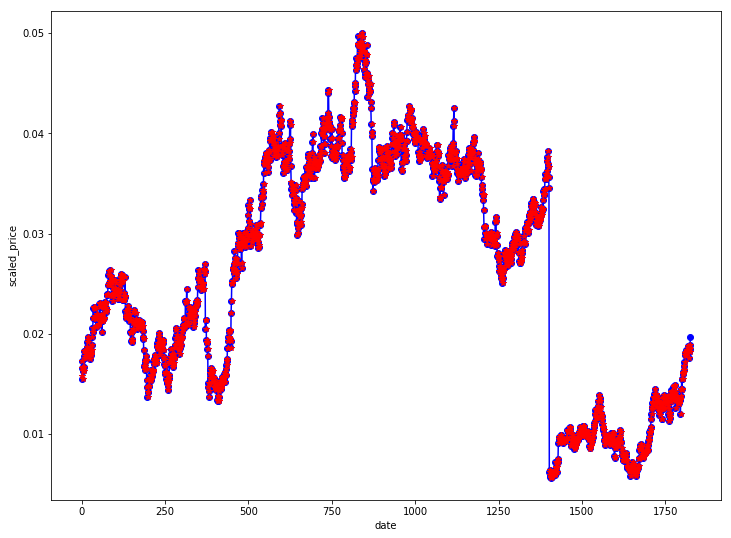

In [65]:
import math
error = mean_squared_error(test, predictions)
print('Test RMSE: %f' % math.sqrt(error))
# plot
plt.figure(figsize=(12,9))
plt.plot(test, '-ob')
plt.xlabel('date')
plt.ylabel('scaled_price')
plt.plot(predictions, '*r')
plt.show()

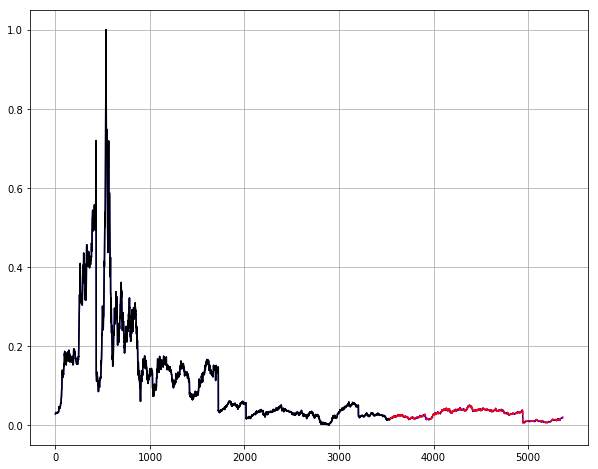

In [66]:
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(series.values, 'b')
plt.plot(train, 'k')
plt.plot(range(size, len(X)), predictions, '--r')
plt.show()

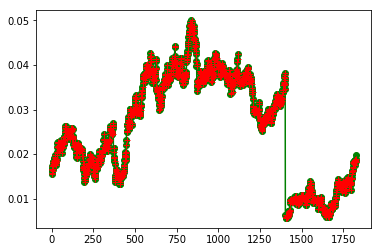

In [67]:
plt.plot(test, '-og')
plt.plot(predictions, '+r')

In [56]:
X = series.values
history = [i for i in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    ci = output[2]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted = {}, Confidence= {}'.format(yhat, ci))

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = [0.01968856], Confidence= [[-0.00169476  0.04107188]]


C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = [0.01968698], Confidence= [[-0.00169435  0.04106832]]
predicted = [0.01968541], Confidence= [[-0.00169393  0.04106475]]
predicted = [0.01968383], Confidence= [[-0.00169352  0.04106118]]
predicted = [0.01968226], Confidence= [[-0.0016931   0.04105762]]
predicted = [0.01968068], Confidence= [[-0.00169269  0.04105405]]
predicted = [0.0196791], Confidence= [[-0.00169228  0.04105049]]
predicted = [0.01967753], Confidence= [[-0.00169187  0.04104692]]
predicted = [0.01967595], Confidence= [[-0.00169145  0.04104336]]
predicted = [0.01967438], Confidence= [[-0.00169104  0.04103979]]


In [57]:
#import numpy as np
#import matplotlib.pyplot as plt
#from hurst import compute_Hc, random_walk

In [60]:
mms.inverse_transform(predictions)

array([[386.03514999],
       [386.02029998],
       [386.00544715],
       [385.99059439],
       [385.97574151],
       [385.96088839],
       [385.94603442],
       [385.93118097],
       [385.91632885],
       [385.90147884]])

In [59]:
#date = np.array(data['Date'])
#date = date[::-1]
#date

array(['1-January-1998', '2-January-1998', '5-January-1998', ...,
       '21-February-2019', '22-February-2019', '25-February-2019'],
      dtype=object)

In [5]:
#tips = sns.load_dataset('tips')

In [68]:
#tips.head()

In [69]:
#plt.grid()
#ax = sns.scatterplot(x="total_bill", y="tip", data=tips, hue='time')
#plt.show()

In [70]:
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()

In [71]:
#tot_bil = np.array(tips['total_bill'])
#tip = np.array(tips['tip'])
#lr.fit(tot_bil.reshape(-1,1), tip.reshape(-1,1))

In [72]:
#m, c = lr.coef_, lr.intercept_
#x = np.array(range(52))

In [73]:
#y = 0.10502452*x + 0.92026961
#y

In [74]:
#plt.plot(tips['total_bill'], tips['tip'], '*')
#plt.plot(y, '-r')
#plt.show()

In [75]:
#plt.plot(y, '-r')

In [76]:
#sns.__version__